In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("primary-energy-cons.csv")
df

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,7.790772
1,Afghanistan,AFG,1981,8.777320
2,Afghanistan,AFG,1982,9.348327
3,Afghanistan,AFG,1983,11.436162
4,Afghanistan,AFG,1984,11.489043
...,...,...,...,...
12175,Zimbabwe,ZWE,2017,45.256546
12176,Zimbabwe,ZWE,2018,51.809430
12177,Zimbabwe,ZWE,2019,46.119940
12178,Zimbabwe,ZWE,2020,41.996760


In [3]:
countries = df[df["Code"].str.len() <= 3] # Filter countries with country code
country_energy_consumption = countries.groupby("Entity")["Primary energy consumption (TWh)"].sum().reset_index()

country_energy_consumption

,Entity,Primary energy consumption (TWh)
0,Afghanistan,741.911130
1,Albania,1477.097653
2,Algeria,18760.354212
3,American Samoa,86.958440
4,Angola,2169.829460
...,...,...
213,Vietnam,19343.531831
214,Western Sahara,40.145036
215,Yemen,2358.132701
216,Zambia,1639.718953


**Top 10 Countries by Energy Consumption**
   - Identifies and displays the top 10 countries with the highest total primary energy consumption.
   - Presents the data in a styled table with background gradients and formatted numbers for better readability.

In [4]:
top_10_countries = country_energy_consumption.sort_values(by="Primary energy consumption (TWh)", ascending=False).head(10)

def make_pretty(styler):
    styler = styler.background_gradient(cmap='Blues', subset=["Primary energy consumption (TWh)"])
    styler = styler.format({"Primary energy consumption (TWh)": "{:,.2f}"})
    styler = styler.set_table_styles({
        'Entity': [{'selector': 'th', 'props': 'font-weight: bold; text-align: center;'}],  # Bold headers
        'Primary energy consumption (TWh)': [{'selector': 'td', 'props': 'text-align: right;'}],  # Right align numbers
    })
    
    return styler

top_10_countries.style.pipe(make_pretty)

,Entity,Primary energy consumption (TWh)
207,United States,"1,353,940.25"
40,China,"922,517.26"
162,Russia,"322,911.65"
99,Japan,"291,177.82"
75,Germany,"228,102.75"
91,India,"221,080.69"
34,Canada,"184,755.23"
69,France,"150,708.96"
206,United Kingdom,"144,111.42"
26,Brazil,"116,332.58"


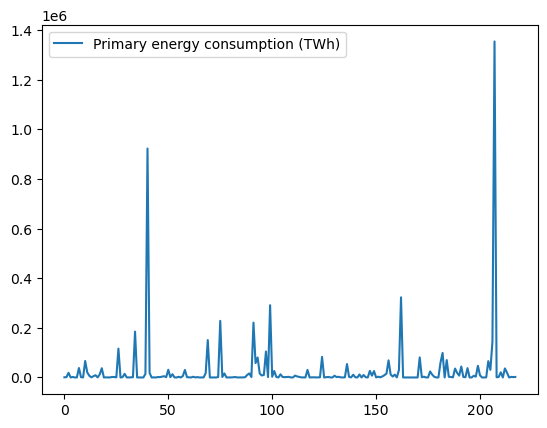

In [5]:
country_energy_consumption.plot()
plt.show()

**Energy Consumption Visualization**
   - Visualizes total primary energy consumption across all countries.
   - Plots a comparison between energy consumption in **China** and the **United States** over the years.

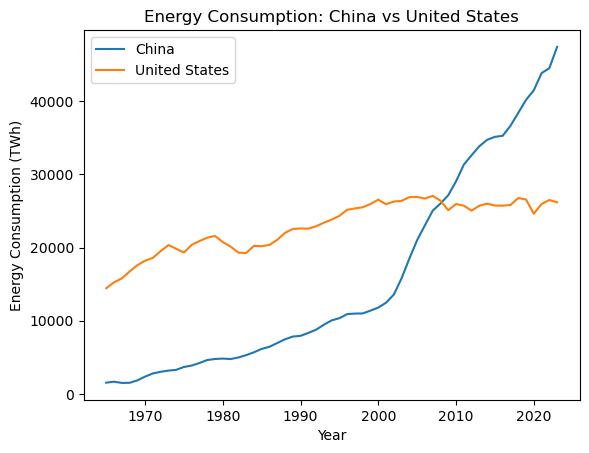

In [6]:
china_data = df[df["Entity"] == "China"]
us_data = df[df["Entity"] == "United States"]

plt.plot(china_data["Year"], china_data["Primary energy consumption (TWh)"], label="China")
plt.plot(us_data["Year"], us_data["Primary energy consumption (TWh)"], label="United States")
plt.title('Energy Consumption: China vs United States')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()
plt.show()

**Year-over-Year Growth**
   - Calculates the year-over-year (YoY) growth rate in China's energy consumption and plots it for better understanding of trends.

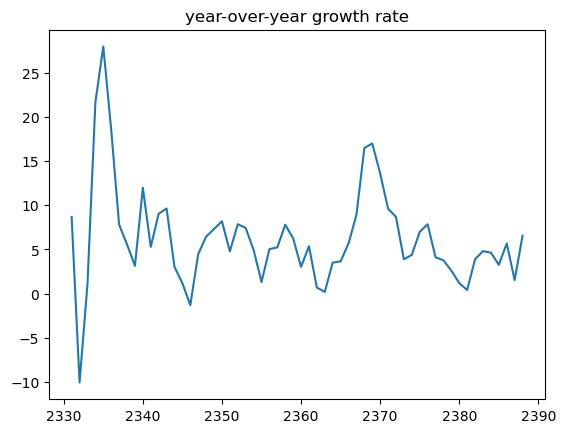

In [7]:
china_data = china_data.copy()  # Make an explicit copy of the DataFrame
china_data['YoY Growth'] = china_data['Primary energy consumption (TWh)'].pct_change() * 100
china_data['YoY Growth'].plot()
plt.title("year-over-year growth rate")
plt.show()

In [8]:
mean_consumption = us_data['Primary energy consumption (TWh)'].mean()
mean_consumption

22948.13981355932

In [9]:
std_dev = us_data['Primary energy consumption (TWh)'].std()
std_dev

3456.019899264453

In [10]:
anomalies = us_data[abs(us_data['Primary energy consumption (TWh)'] - mean_consumption) > 2 * std_dev]
anomalies

,Entity,Code,Year,Primary energy consumption (TWh)
11428,United States,USA,1965,14439.700
11429,United States,USA,1966,15247.363
11430,United States,USA,1967,15778.539


**Linear Regression Model**
   - Trains a linear regression model to predict future energy consumption in the **United States**.
   - The model is evaluated using Mean Absolute Error (MAE) and is used to predict energy consumption until the year **2050**.
   - **Predicted Values:**
     - 2024: 28,488.51 TWh
     - 2030: 29,579.54 TWh
     - 2035: 30,488.74 TWh
     - 2040: 31,397.93 TWh
     - 2045: 32,307.13 TWh
     - 2050: 33,216.32 TWh

In [11]:
us_data = us_data.sort_values('Year')

X = us_data[['Year']] 
y = us_data['Primary energy consumption (TWh)'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

future_years = pd.DataFrame({'Year': [2024, 2030, 2035, 2040, 2045, 2050]})
future_predictions = model.predict(future_years)

# Display the predictions
for year, consumption in zip(future_years['Year'], future_predictions):
    print(f'Predicted Energy Consumption for {year}: {consumption:.2f} TWh')

Mean Absolute Error: 1173.1322696626346
Predicted Energy Consumption for 2024: 28488.51 TWh
Predicted Energy Consumption for 2030: 29579.54 TWh
Predicted Energy Consumption for 2035: 30488.74 TWh
Predicted Energy Consumption for 2040: 31397.93 TWh
Predicted Energy Consumption for 2045: 32307.13 TWh
Predicted Energy Consumption for 2050: 33216.32 TWh


**Actual vs Predicted Plot**
   - Plots the actual vs predicted energy consumption for the United States, allowing for comparison between the observed and modeled values.

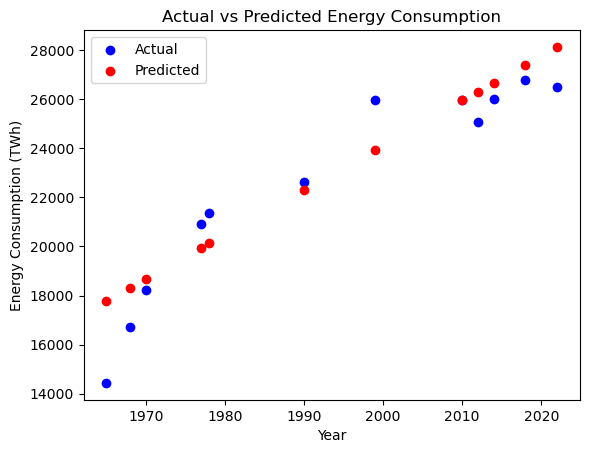

In [12]:
# Plotting the actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()